In [1]:
import numpy as np 
import pandas as pd 
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

['column_2C_weka.csv', 'column_3C_weka.csv']


In [2]:
data = pd.read_csv('../input/column_2C_weka.csv')

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [5]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


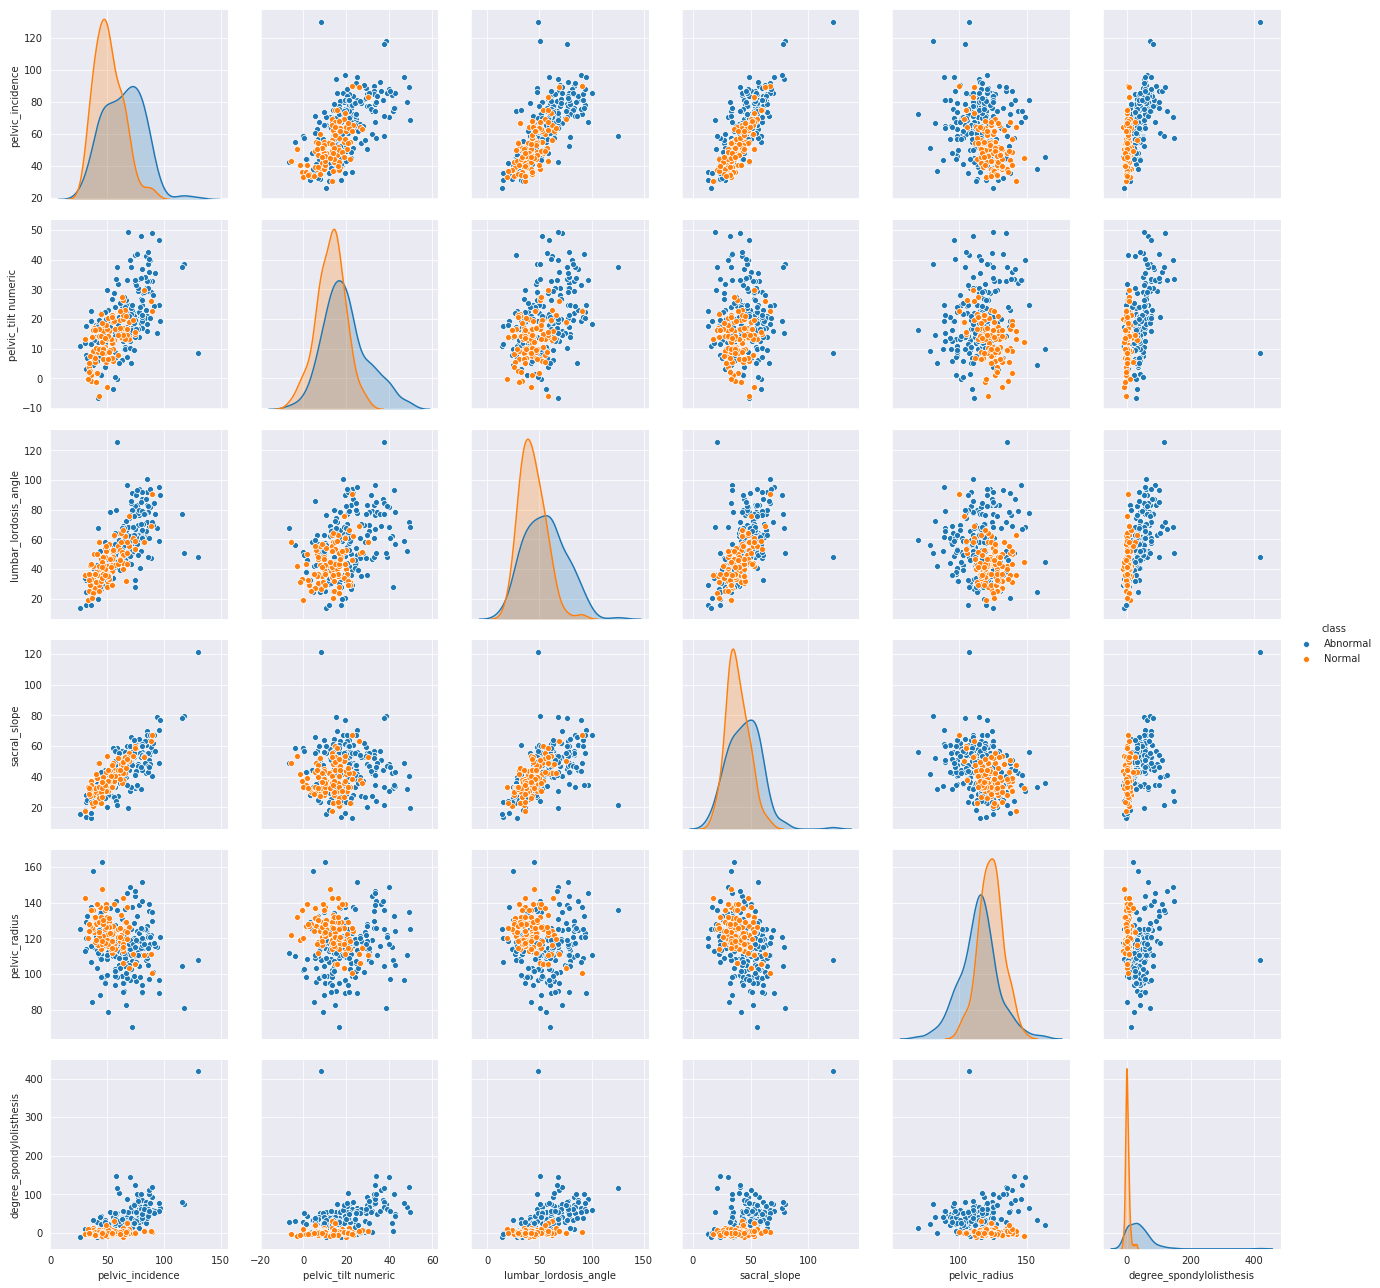

In [6]:
sns.pairplot(data,hue = 'class',height = 3)

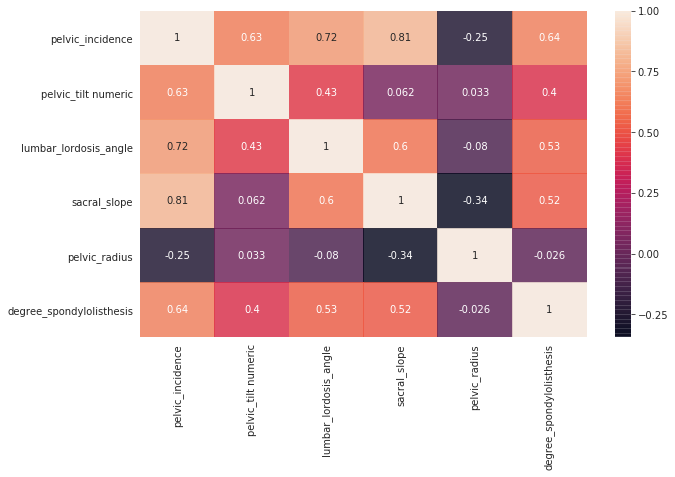

In [7]:
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(),alpha = 0.8,annot = True)

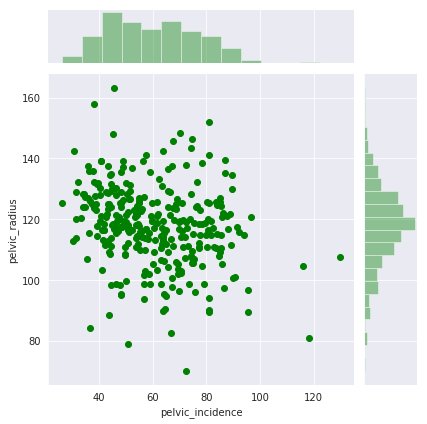

In [8]:
sns.jointplot(x = 'pelvic_incidence',y = 'pelvic_radius',data = data,color = 'green')

In [9]:
A = data[data['class'] == 'Abnormal']
N = data[data['class'] == 'Normal']

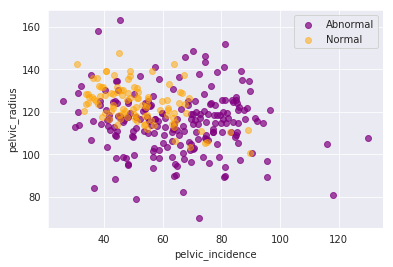

In [10]:
plt.scatter(A.pelvic_incidence, A.pelvic_radius, color = 'purple', label = 'Abnormal',alpha = 0.7)
plt.scatter(N.pelvic_incidence, N.pelvic_radius, color = 'orange', label = 'Normal', alpha = 0.5)
plt.xlabel('pelvic_incidence')
plt.ylabel('pelvic_radius')
plt.legend()
plt.show()

In [11]:
CLASS = pd.get_dummies(data['class'],drop_first = True)

In [12]:
data = pd.concat([data,CLASS],axis = 1)

In [13]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,Normal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,0


In [14]:
data.drop(['class'],axis = 1,inplace = True)

In [15]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Normal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [16]:
y = data['Normal'].values
x_data = data.drop(['Normal'], axis=1)

In [17]:
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [19]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

In [20]:
print('{} KNN score: {}'.format(3,knn.score(x_test,y_test)))

3 KNN score: 0.7580645161290323


In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=31,p = 2,metric = 'euclidean')

In [23]:
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=31, p=2,
           weights='uniform')

In [24]:
pred = knn.predict(x)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(confusion_matrix(y,pred))
print(classification_report(y,pred))

[[185  25]
 [ 29  71]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       210
           1       0.74      0.71      0.72       100

   micro avg       0.83      0.83      0.83       310
   macro avg       0.80      0.80      0.80       310
weighted avg       0.82      0.83      0.82       310



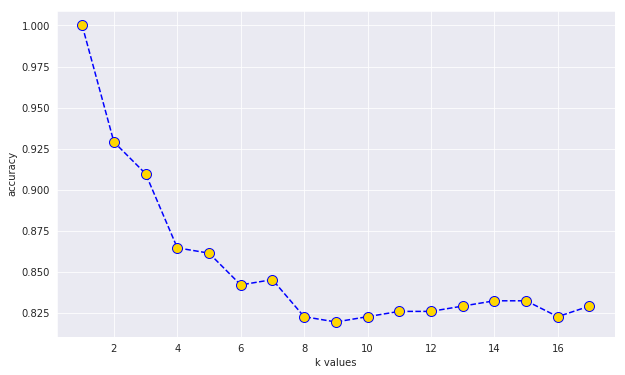

In [27]:
score_list = []
for each in range(1,18):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x, y)
    score_list.append(knn2.score(x,y))
    
plt.figure(figsize = (10,6))
plt.plot(range(1,18),score_list,color = 'blue',linestyle = 'dashed',marker = 'o',markerfacecolor = 'gold',markersize = 10)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()